# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [45]:
# Load data
url = "https://docs.google.com/spreadsheets/d/1-x8hz_KfX4qg-GDp6i4WZzNG9pp7b0KaEO_pJwFGrwU/export?format=xlsx"

# langsung baca sebagai excel
df = pd.read_excel(url)

In [46]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [47]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   PreviousTransactionDate  2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

In [48]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,PreviousTransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2511.000000,2509,2519.000000,2511.000000,2516.000000,2510.000000,2513
mean,297.656468,2023-07-05 17:33:20.831805440,44.678444,119.422939,1.121622,5113.438124,2024-11-04 08:09:22.576999424
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.310000,2023-04-03 16:14:34,27.000000,63.000000,1.000000,1504.727500,2024-11-04 08:07:54
50%,211.360000,2023-07-07 17:40:58,45.000000,112.000000,1.000000,4734.110000,2024-11-04 08:09:23
75%,413.105000,2023-10-06 18:44:37,59.000000,161.000000,1.000000,7672.687500,2024-11-04 08:10:54
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,292.230367,NaN,17.837359,70.078513,0.594469,3897.975861,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

<Axes: >

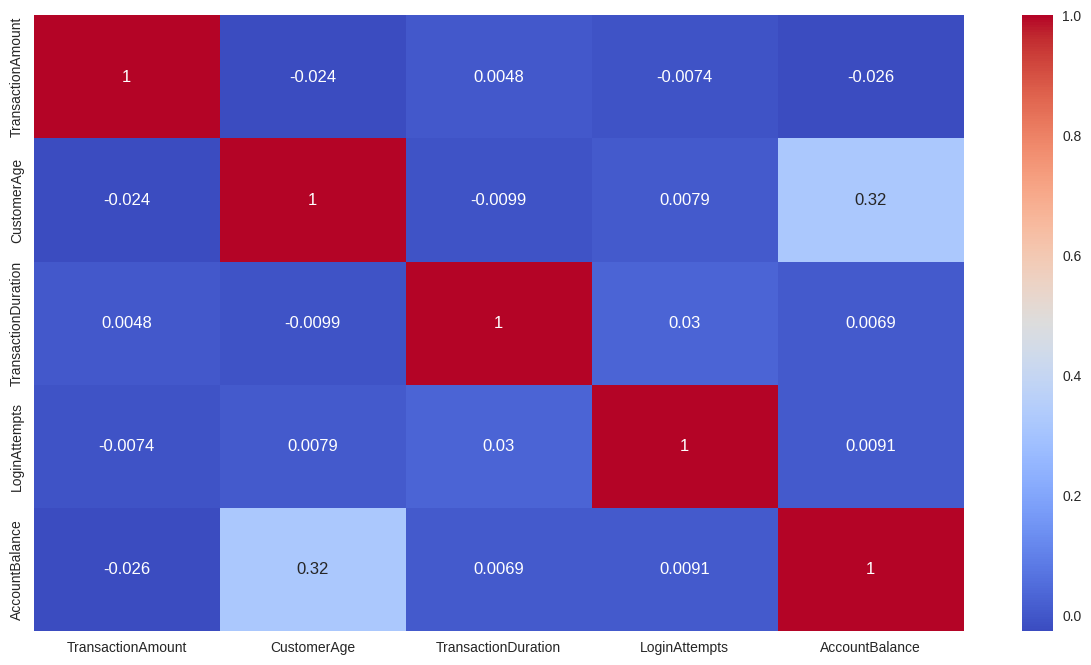

In [49]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(15, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'PreviousTransactionDate'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>,
        <Axes: title={'center': 'AccountBalance'}>],
       [<Axes: title={'center': 'TransactionDate'}>, <Axes: >, <Axes: >]],
      dtype=object)

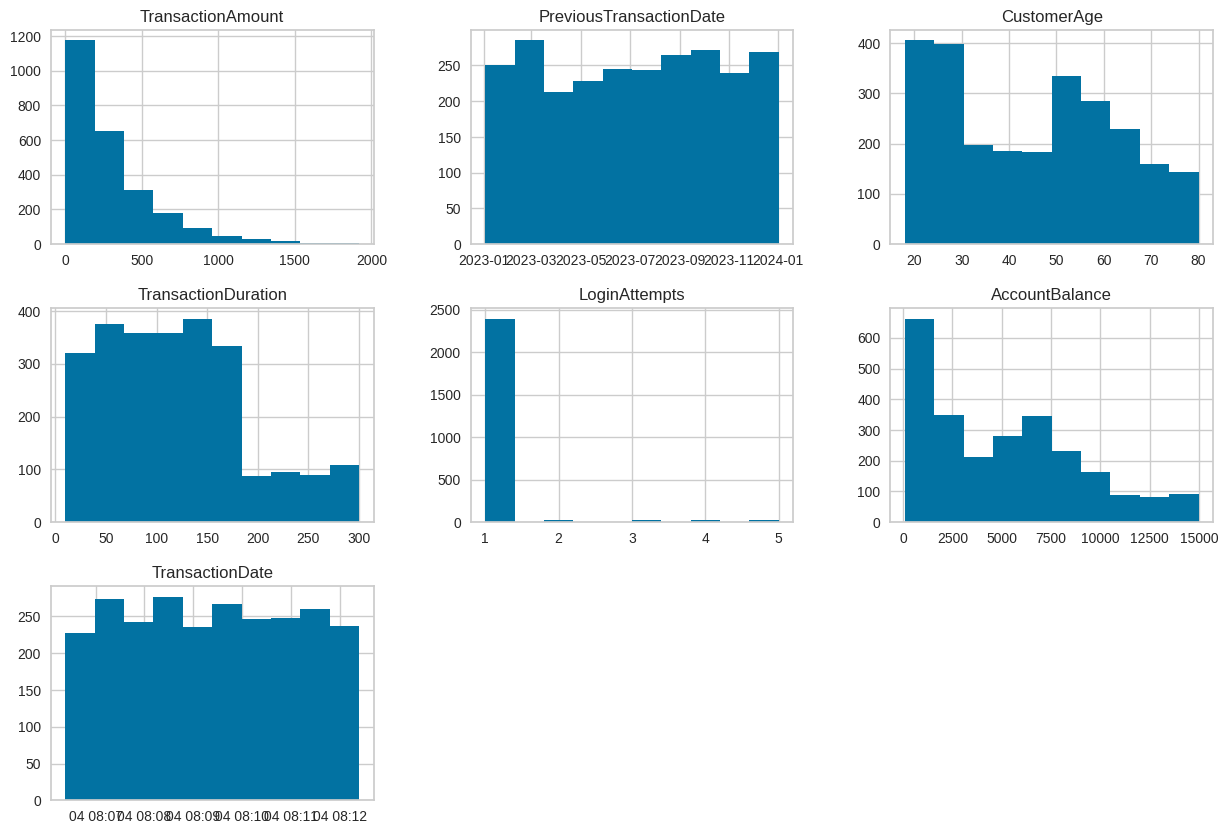

In [50]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize = (15, 10))

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

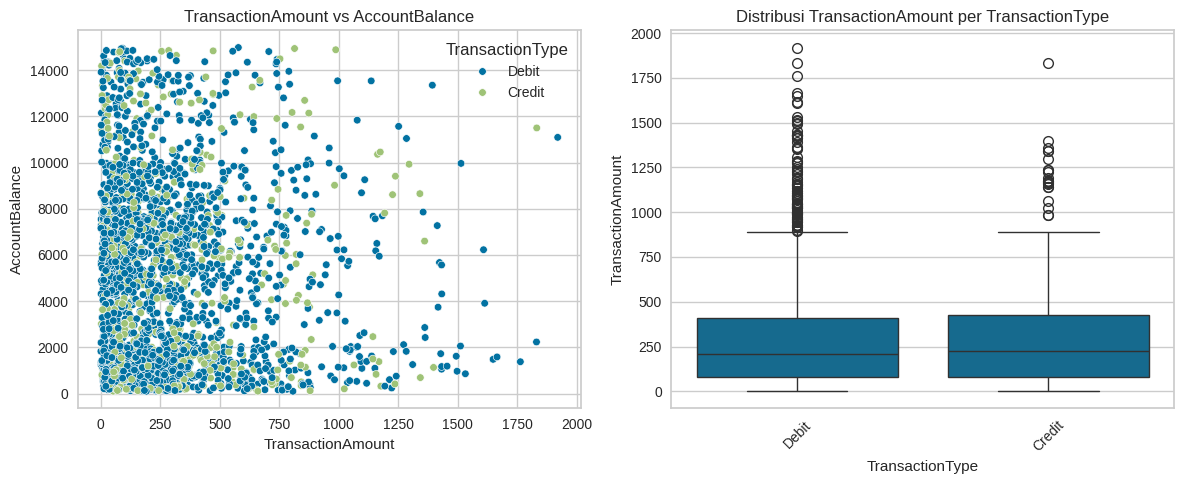

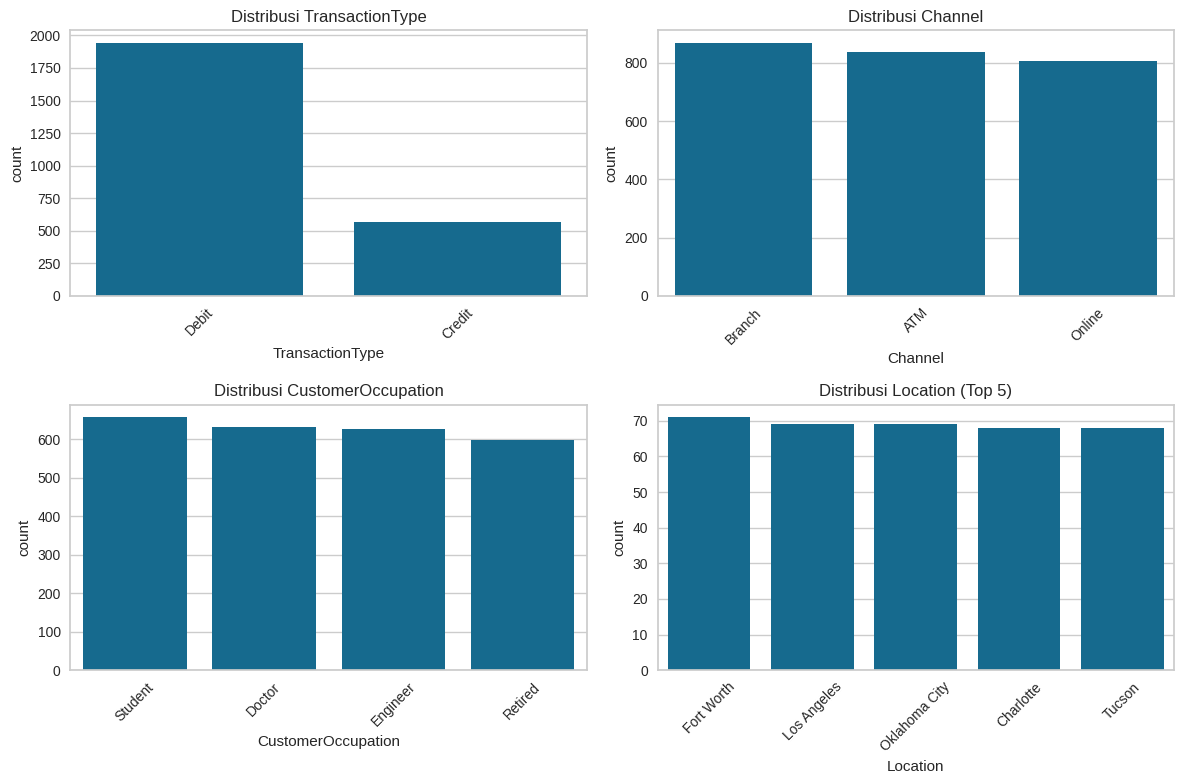

In [51]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# --------------
# Hubungan Variabel
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom
sns.scatterplot(
    data=df,
    x="TransactionAmount",
    y="AccountBalance",
    hue="TransactionType",
    s=30,
    ax=axes[0]
)
axes[0].set_title("TransactionAmount vs AccountBalance")

sns.boxplot(
    data=df,
    x="TransactionType",
    y="TransactionAmount",
    ax=axes[1]
)
axes[1].set_title("Distribusi TransactionAmount per TransactionType")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
# -----------------
# distrubusi kolom kategorikal
cat_cols = ["TransactionType", "Channel", "CustomerOccupation", "Location"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 baris, 2 kolom
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    if col == "Location":
        top5 = df[col].value_counts().nlargest(5).index
        sns.countplot(data=df[df[col].isin(top5)], x=col, order=top5, ax=ax)
        ax.set_title(f"Distribusi {col} (Top 5)")
    else:
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
        ax.set_title(f"Distribusi {col}")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [52]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [53]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [54]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ["TransactionAmount", "TransactionDuration", "AccountBalance", "CustomerAge", "LoginAttempts"]

scaler_minmax = MinMaxScaler()
df_normalized = df.copy() # Create a copy to avoid modifying the original DataFrame
df_normalized[numeric_cols] = scaler_minmax.fit_transform(df_normalized[numeric_cols])

display(df_normalized.head())

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [55]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

columns_to_drop = ["TransactionID", "AccountID", "DeviceID", "MerchantID", "IP Address"]
df_normalized = df_normalized.drop(columns=columns_to_drop)

In [56]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

df_encoded = df_normalized.copy()
encoders = {}  # dictionary untuk simpan encoder tiap kolom

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le  # simpan encoder kolom ini

display(df_encoded.head())

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [57]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_encoded.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [58]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_encoded.dropna(inplace=True)

In [59]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_encoded.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [60]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# meggunakan capping
df_processed = df_encoded.copy()

for col in numeric_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # winsorizing
    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound,
                      np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col]))

print("Shape after capping outliers:", df_processed.shape)

Shape after capping outliers: (2348, 11)


In [61]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [62]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_processed.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2348.000000,2348,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.0,2348.000000,2348
mean,0.147503,2023-07-05 11:37:52.443781888,0.788756,21.424617,1.011073,0.430476,1.528535,0.378091,0.0,0.336489,2024-11-04 08:09:22.644804096
min,0.000000,2023-01-02 16:00:06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2024-11-04 08:06:23
25%,0.042249,2023-04-02 22:45:41,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.093553,2024-11-04 08:07:54
50%,0.109899,2023-07-06 18:13:32,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.309532,2024-11-04 08:09:23
75%,0.214105,2023-10-06 16:20:27.249999872,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.510548,2024-11-04 08:10:53
max,0.471888,2024-01-01 18:21:50,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,2024-11-04 08:12:23
std,0.130508,NaN,0.437496,12.432136,0.829195,0.287711,1.154655,0.243118,0.0,0.262597,NaN


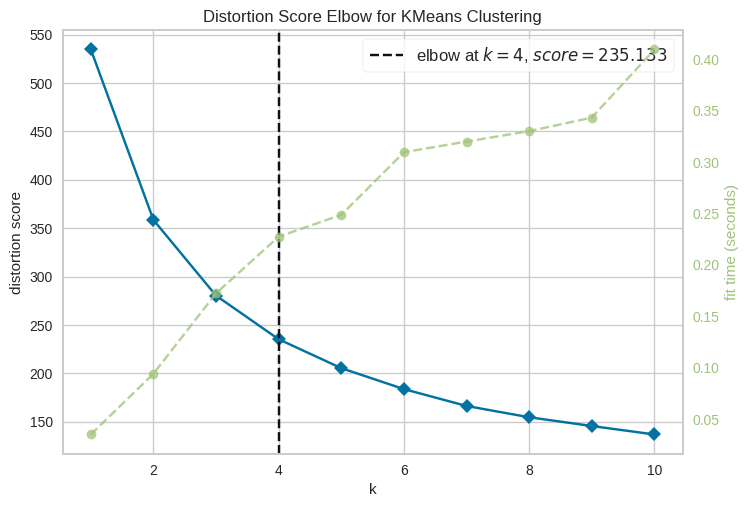

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X = df_processed[numeric_cols]

model = KMeans(random_state=42, n_init=50)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X)

visualizer.show()

In [64]:
# Menggunakan algoritma K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=50)
df_processed['Cluster'] = kmeans.fit_predict(X)

Jalankan cell code ini untuk menyimpan model kamu.

In [65]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [66]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, df_processed['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3012482688450016


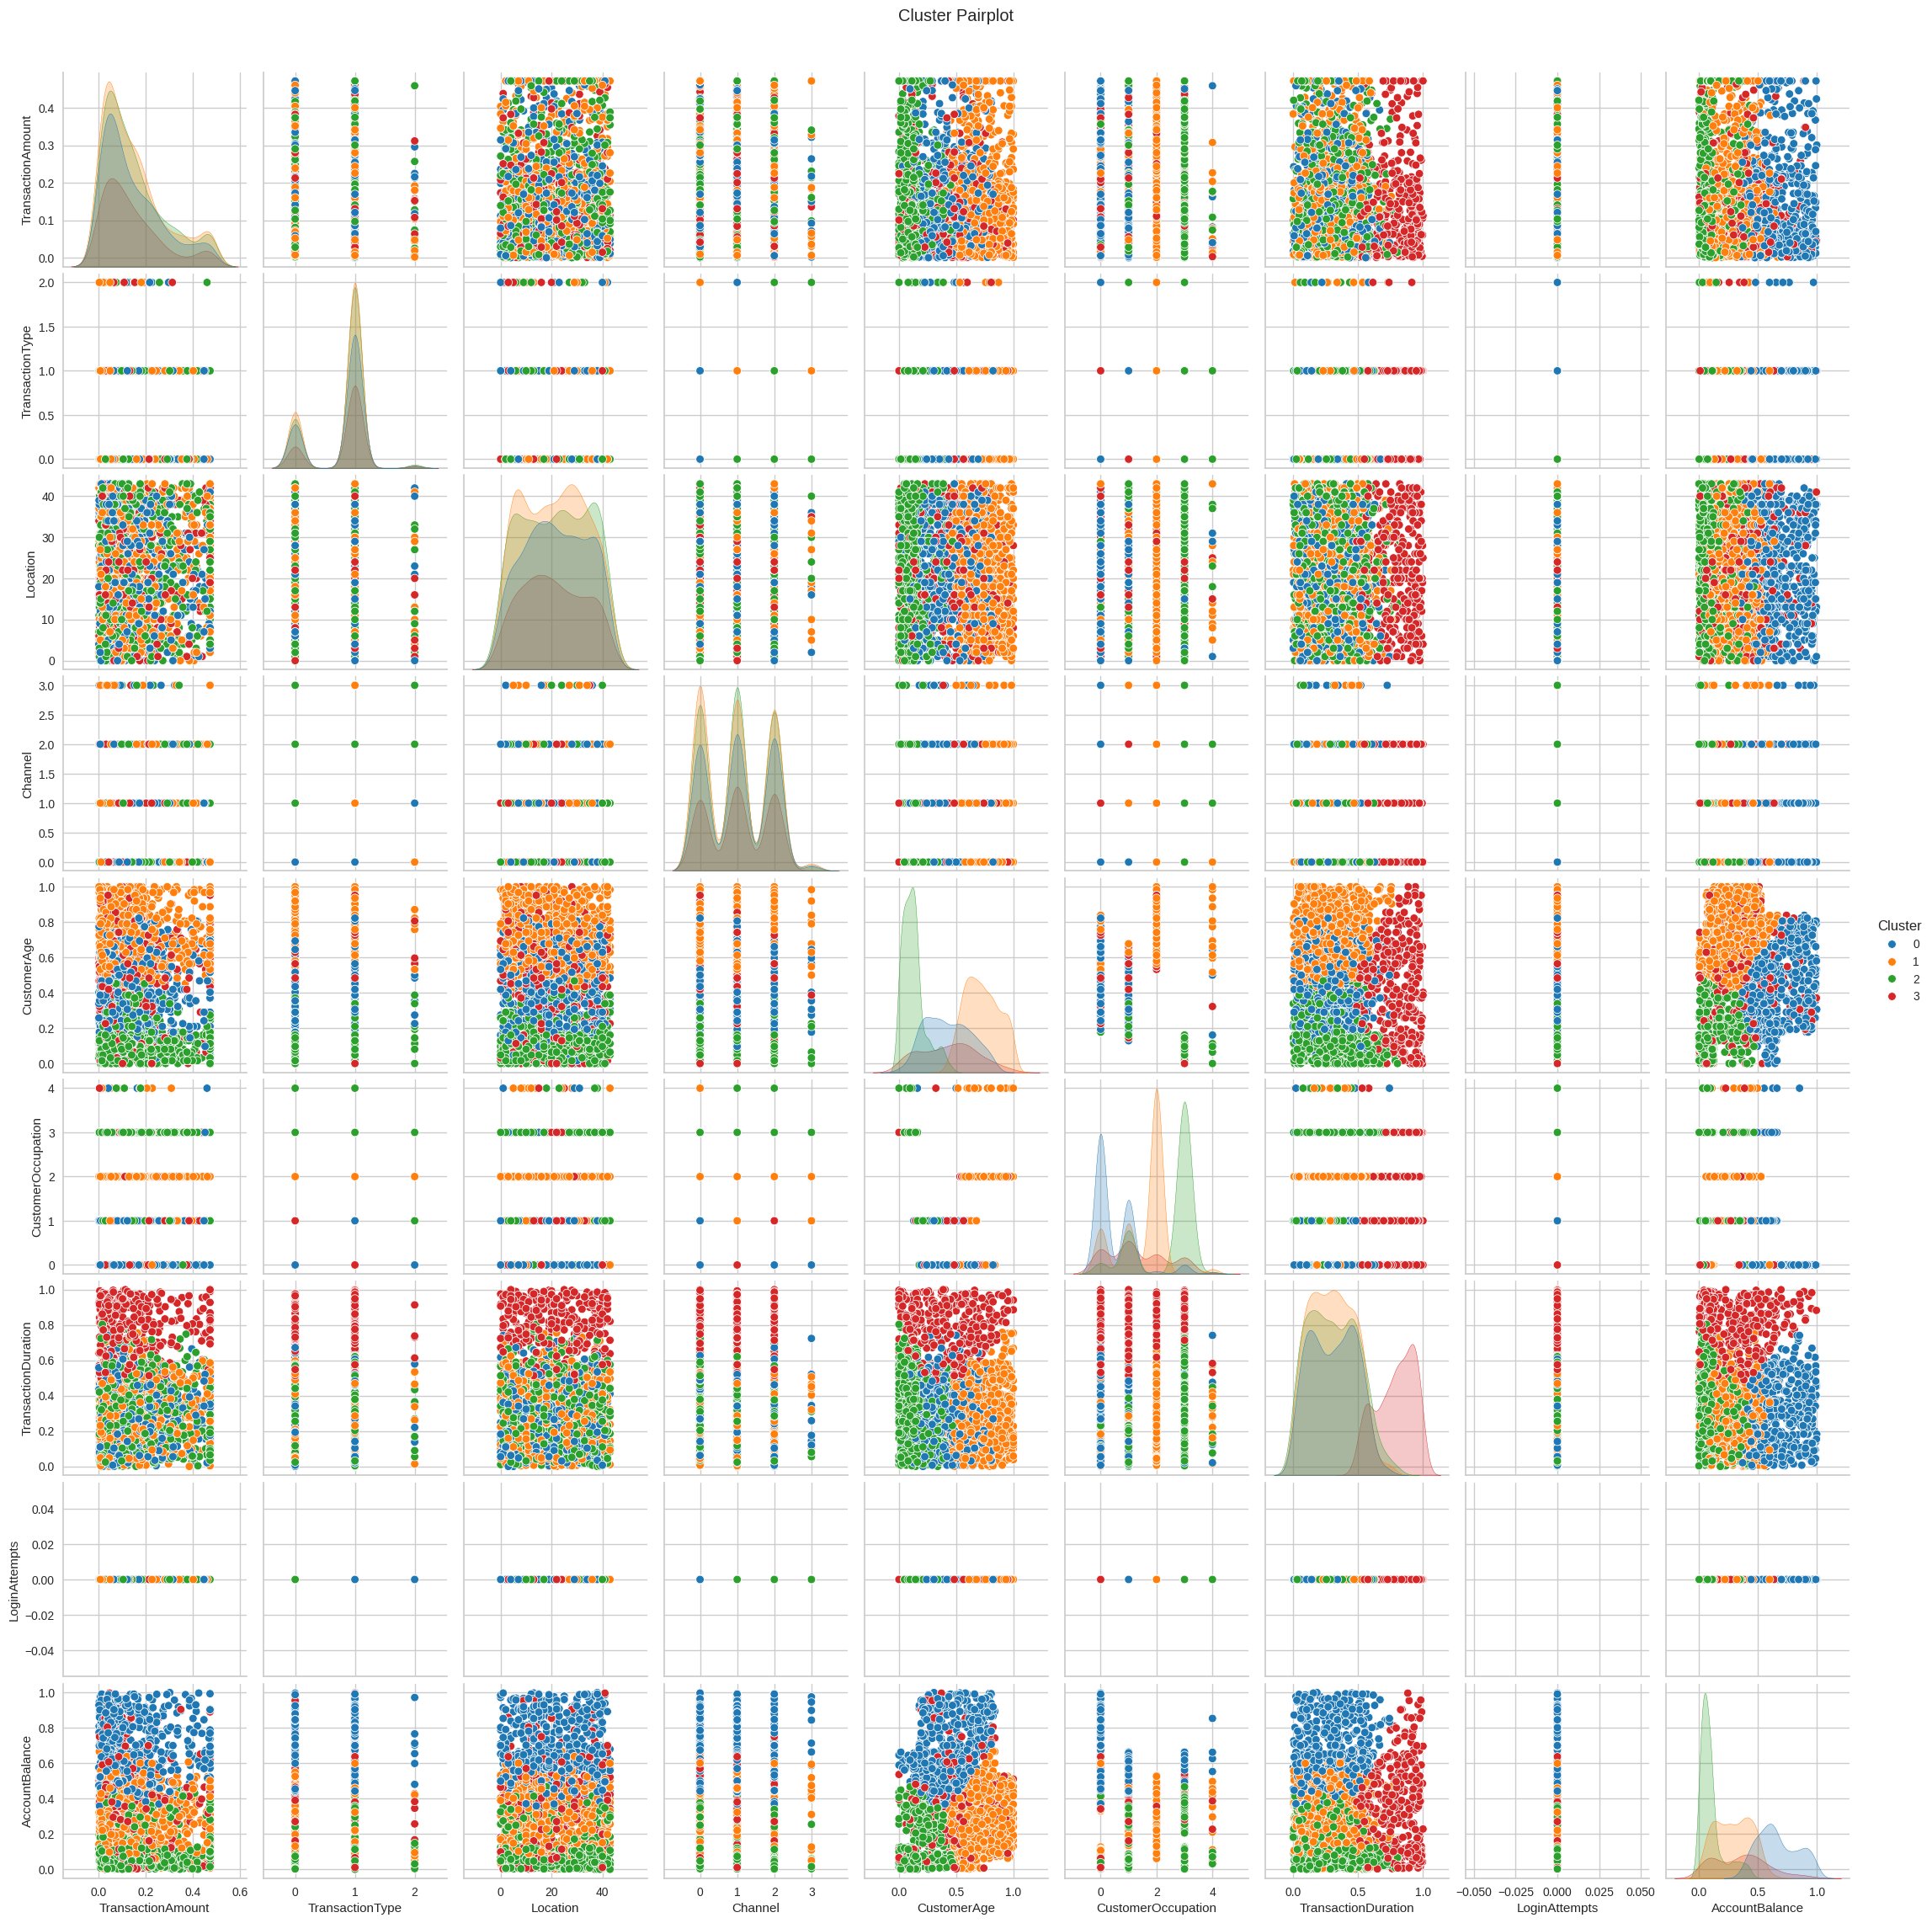

In [67]:
# Membuat visualisasi hasil clustering
sns.pairplot(df_processed, hue="Cluster", diag_kind="kde", palette="tab10")
plt.suptitle("Cluster Pairplot", y=1.02)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [68]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA

pca =PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_2 = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(PCA_2)

KMeans(n_clusters=4)

In [69]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [70]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
# Agregasi dengan fungsi statistik
agg_funcs = ['mean', 'min', 'max', 'median', 'std', 'count']

for col in numeric_cols:
    print(f"\n {col}")
    display(df_processed.groupby('Cluster')[col].agg(agg_funcs))


 TransactionAmount


,mean,min,max,median,std,count
Cluster,,,,,,
0,0.145127,0.000031,0.471888,0.102092,0.128684,575
1,0.148552,0.000302,0.471888,0.111046,0.132713,726
2,0.150914,0.000000,0.471888,0.113573,0.131310,693
3,0.142534,0.000495,0.471888,0.106817,0.127605,354



 TransactionDuration


,mean,min,max,median,std,count
Cluster,,,,,,
0,0.306777,0.000000,0.741379,0.317241,0.174092,575
1,0.300945,0.000000,0.758621,0.296552,0.169546,726
2,0.310459,0.000000,0.820690,0.303448,0.187134,693
3,0.784541,0.462069,1.000000,0.808621,0.144354,354



 AccountBalance


,mean,min,max,median,std,count
Cluster,,,,,,
0,0.667912,0.352578,1.000000,0.640513,0.170083,575
1,0.290990,0.001320,0.666534,0.288376,0.152001,726
2,0.100825,0.000000,0.466889,0.069043,0.100937,693
3,0.352815,0.002333,0.996663,0.358554,0.227023,354



 CustomerAge


,mean,min,max,median,std,count
Cluster,,,,,,
0,0.426620,0.000000,0.838710,0.403226,0.197517,575
1,0.724473,0.403226,1.000000,0.709677,0.147991,726
2,0.124773,0.000000,0.467742,0.112903,0.099643,693
3,0.432249,0.000000,1.000000,0.451613,0.247429,354



 LoginAttempts


,mean,min,max,median,std,count
Cluster,,,,,,
0,0.0,0.0,0.0,0.0,0.0,575
1,0.0,0.0,0.0,0.0,0.0,726
2,0.0,0.0,0.0,0.0,0.0,693
3,0.0,0.0,0.0,0.0,0.0,354


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.


**Cluster 0: (Saldo Tinggi, Durasi Transaksi Sedang, Usia Menengah)**

* Rata-rata Account Balance: **0.668**
* Rata-rata Transaction Amount: **0.145**
* Rata-rata Transaction Duration: **0.307**
* Rata-rata Customer Age: **0.427**
  **Analisis:** Cluster ini terdiri dari nasabah dengan saldo relatif tinggi namun nominal transaksi tidak terlalu besar. Usia pelanggan cenderung menengah, dengan durasi transaksi normal (tidak terlalu cepat atau lama). Kelompok ini cocok ditargetkan dengan layanan premium harian seperti tabungan berbunga tinggi atau promosi loyalitas.


**Cluster 1: (Nasabah Usia Matang, Transaksi Stabil, Saldo Menengah ke Bawah)**

* Rata-rata Account Balance: **0.291**
* Rata-rata Transaction Amount: **0.149**
* Rata-rata Transaction Duration: **0.301**
* Rata-rata Customer Age: **0.724**
  **Analisis:** Nasabah di cluster ini lebih tua dibanding cluster lain, dengan saldo relatif kecil namun masih aktif bertransaksi dalam jumlah nominal stabil. Mereka bisa ditawarkan produk pensiun, asuransi, atau layanan investasi aman untuk usia matang.


**Cluster 2: (Nasabah Muda, Saldo dan Aktivitas Rendah)**

* Rata-rata Account Balance: **0.101**
* Rata-rata Transaction Amount: **0.151**
* Rata-rata Transaction Duration: **0.310**
* Rata-rata Customer Age: **0.125**
  **Analisis:** Cluster ini berisi nasabah usia muda dengan saldo sangat rendah dan transaksi nominal kecil. Mereka berpotensi sebagai nasabah jangka panjang jika diberikan insentif awal seperti promo mahasiswa, layanan entry-level, atau produk finansial edukatif.


**Cluster 3: (Nasabah Durasi Transaksi Panjang, Saldo Sedang, Usia Bervariasi)**

* Rata-rata Account Balance: **0.353**
* Rata-rata Transaction Amount: **0.143**
* Rata-rata Transaction Duration: **0.785**
* Rata-rata Customer Age: **0.432**
  **Analisis:** Kelompok ini unik karena meskipun saldo sedang, durasi transaksi mereka jauh lebih panjang daripada cluster lain. Hal ini menunjukkan preferensi transaksi lebih kompleks (misalnya transfer besar, pembayaran tagihan, atau proses manual). Rekomendasi: tingkatkan kenyamanan transaksi digital, sediakan layanan prioritas untuk mempercepat proses.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [71]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_processed = df_processed.rename(columns={'Cluster': 'Target'})

In [72]:
# Simpan Data
df_processed.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [73]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [75]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
df_inverse = df_processed.copy()
for col in categorical_cols:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))
# Tampilkan dataset hasil inverse
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,1
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,0
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,2
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,0
5,0.047888,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045738,2024-11-04 08:06:36,2


In [77]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
for col in numeric_cols:
    print(f"\n {col}")
    display(df_inverse.groupby('Target')[col].agg(agg_funcs))


 TransactionAmount


,mean,min,max,median,std,count
Target,,,,,,
0,0.145127,0.000031,0.471888,0.102092,0.128684,575
1,0.148552,0.000302,0.471888,0.111046,0.132713,726
2,0.150914,0.000000,0.471888,0.113573,0.131310,693
3,0.142534,0.000495,0.471888,0.106817,0.127605,354



 TransactionDuration


,mean,min,max,median,std,count
Target,,,,,,
0,0.306777,0.000000,0.741379,0.317241,0.174092,575
1,0.300945,0.000000,0.758621,0.296552,0.169546,726
2,0.310459,0.000000,0.820690,0.303448,0.187134,693
3,0.784541,0.462069,1.000000,0.808621,0.144354,354



 AccountBalance


,mean,min,max,median,std,count
Target,,,,,,
0,0.667912,0.352578,1.000000,0.640513,0.170083,575
1,0.290990,0.001320,0.666534,0.288376,0.152001,726
2,0.100825,0.000000,0.466889,0.069043,0.100937,693
3,0.352815,0.002333,0.996663,0.358554,0.227023,354



 CustomerAge


,mean,min,max,median,std,count
Target,,,,,,
0,0.426620,0.000000,0.838710,0.403226,0.197517,575
1,0.724473,0.403226,1.000000,0.709677,0.147991,726
2,0.124773,0.000000,0.467742,0.112903,0.099643,693
3,0.432249,0.000000,1.000000,0.451613,0.247429,354



 LoginAttempts


,mean,min,max,median,std,count
Target,,,,,,
0,0.0,0.0,0.0,0.0,0.0,575
1,0.0,0.0,0.0,0.0,0.0,726
2,0.0,0.0,0.0,0.0,0.0,693
3,0.0,0.0,0.0,0.0,0.0,354


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

### Cluster 0: (Saldo Tinggi, Durasi Transaksi Sedang)

* Rata-rata TransactionAmount: **0.145**
* Rata-rata TransactionDuration: **0.307**
* Rata-rata AccountBalance: **0.668**
* Rata-rata CustomerAge: **0.427**
* Analisis: Cluster ini mencakup nasabah dengan **saldo akun relatif tinggi** namun jumlah transaksi kecil dan durasi transaksi sedang. Usia nasabah berada pada kategori menengah. Kelompok ini cenderung menjaga saldo besar dan bertransaksi cukup moderat. Rekomendasi strategi: tawarkan layanan tabungan premium atau investasi jangka menengah.


### Cluster 1: (Nasabah Usia Lebih Tua dengan Saldo Menengah)

* Rata-rata TransactionAmount: **0.149**
* Rata-rata TransactionDuration: **0.301**
* Rata-rata AccountBalance: **0.291**
* Rata-rata CustomerAge: **0.724**
* Analisis: Nasabah dalam cluster ini rata-rata berusia **lebih tua** dengan saldo akun menengah dan transaksi moderat. Mereka kemungkinan lebih konservatif, tidak menyimpan terlalu banyak saldo dan melakukan transaksi stabil. Rekomendasi strategi: tawarkan produk pensiun, proteksi keuangan, atau paket layanan loyalitas.


### Cluster 2: (Nasabah Muda dengan Saldo Rendah)

* Rata-rata TransactionAmount: **0.151**
* Rata-rata TransactionDuration: **0.310**
* Rata-rata AccountBalance: **0.101**
* Rata-rata CustomerAge: **0.125**
* Analisis: Cluster ini berisi nasabah **berusia muda** dengan saldo akun rendah namun jumlah transaksi dan durasi mirip dengan cluster lain. Mereka cenderung baru memulai hubungan dengan layanan keuangan. Rekomendasi strategi: dorong penggunaan produk entry-level seperti tabungan dasar, kredit pemula, atau promosi cashback.


### Cluster 3: (Durasi Transaksi Tinggi, Saldo Menengah)

* Rata-rata TransactionAmount: **0.143**
* Rata-rata TransactionDuration: **0.785**
* Rata-rata AccountBalance: **0.353**
* Rata-rata CustomerAge: **0.432**
* Analisis: Nasabah di cluster ini memiliki **durasi transaksi paling lama** dibanding cluster lain, saldo akun menengah, dan usia menengah. Kemungkinan besar mereka melakukan transaksi yang lebih kompleks atau sering menggunakan layanan digital lebih lama. Rekomendasi strategi: tingkatkan pengalaman digital banking, percepat proses transaksi online, dan tawarkan layanan prioritas.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [78]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,1
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,0
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,2
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,0
5,0.047888,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045738,2024-11-04 08:06:36,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2510,0.096782,2023-02-24 16:24:46,Debit,Denver,Online,0.080645,Student,0.031034,0.0,0.112636,2024-11-04 08:12:22,2
2511,0.126545,2023-02-14 16:21:23,Credit,Jacksonville,Online,0.096774,Student,0.286207,0.0,0.002017,2024-11-04 08:07:49,2
2523,0.006212,2023-04-20 18:50:39,Debit,New York,Branch,0.935484,Retired,0.231034,0.0,0.323188,2024-11-04 08:07:37,1
2524,0.120833,2023-12-28 17:31:03,Debit,Omaha,ATM,0.306452,Engineer,0.141379,0.0,0.442881,2024-11-04 08:09:17,0


In [79]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.